In [47]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# load data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [49]:
X = iris.data[:, :2] # only take the first two features
y = iris.target

In [50]:
h = 0.02 # step size in mesh

In [51]:
# import the classifier
from sklearn.linear_model import LogisticRegression 
# create an instance of the classifier
logreg = LogisticRegression(C=1e5)

In [52]:
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

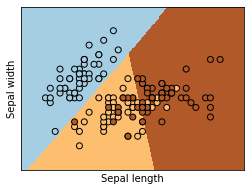

In [54]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c = y, edgecolors='k' )
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## MTCARS

In [55]:
MTCARS_LOCATION = "datasets/mtcars.csv"

In [56]:
mtcars = pd.read_csv(MTCARS_LOCATION)

In [57]:
# check if there is any NaN values 
mtcars.isnull().sum()

Unnamed: 0    0
Unnamed: 1    1
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [58]:
features = np.array(mtcars.columns)
features = np.delete(features, [0,1]) # remove 'Unnamed: 1' and 'Unnamed: 0'

In [59]:
cars = pd.DataFrame(mtcars, columns=features)

In [60]:
# check that we have no NaN values
cars.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [61]:
cars['make'] = mtcars['Unnamed: 0']

In [62]:
# Converts car names to a unique digit in order to identify them
y = pd.factorize(cars['make'])[0]

y

array([ 0,  1,  1,  2,  3,  4,  4,  2,  5,  6,  7,  8,  8,  9, 10,  1,  1,
       11,  9, 12,  1,  1,  1, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [63]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(cars[features], y, test_size=0.20 ,random_state=0)

In [65]:
logreg = LogisticRegression(C=1e5, max_iter=1000)

logreg.fit(X_train, y_train)

/Users/frankpalma/Desktop/Machine-Learning-Examples/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# make predictions
y_pred = logreg.predict(X_test)

In [67]:
from sklearn import metrics

In [69]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]])

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.5714285714285714
Precision: 0.25
Recall: 0.2857142857142857


/Users/frankpalma/Desktop/Machine-Learning-Examples/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
